# Milestone 2

In [1]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("deep")

In [3]:
DATA = './data/'

## 1. Introduction to patents


## 2. Data preperation and analysis

### 2.1 Source of the data

### 2.2 Sighting the data

#### Citations


In [346]:
citations_raw = pd.read_csv(DATA + 'citations_raw.tsv', delimiter='\t', nrows=5)
citations_raw.head()

,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
0,000007b7c0x3n9iy1othb9hz7,9009250,8127342,2012-02-01,Boynton et al.,B2,US,cited by applicant,622
1,000007obbnxmqc6v43t1c00dw,9643605,5471515,1995-11-01,Fossum et al.,A,US,cited by applicant,413
2,00000jd7thmiucpaol1hm1835,5354551,4875247,1989-10-01,Berg,NaN,US,NaN,11
3,00000oohcwply47niwhm5i42l,D786922,D718330,2014-11-01,Shin,S,US,cited by examiner,11
4,00002ghv7v87txbmryocp9i60,D490798,D190749,1961-06-01,Matri et al.,S,US,cited by examiner,1


In [347]:
citations_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
uuid           5 non-null object
patent_id      5 non-null object
citation_id    5 non-null object
date           5 non-null object
name           5 non-null object
kind           4 non-null object
country        5 non-null object
category       4 non-null object
sequence       5 non-null int64
dtypes: int64(1), object(8)
memory usage: 440.0+ bytes


In [348]:
del citations_raw

#### Patents


In [350]:
patents_raw = pd.read_csv(DATA + 'patents_raw.tsv', delimiter='\t', nrows=5)
patents_raw.head()

,id,type,number,country,date,abstract,title,kind,num_claims,filename
0,3930271,utility,3930271,US,1976-01-06,A golf glove is disclosed having an extra fin...,Golf glove,A,4,pftaps19760106_wk01.zip
1,3930272,utility,3930272,US,1976-01-06,A lock for a height-adjustable crib or plaype...,Crib leg lock,A,3,pftaps19760106_wk01.zip
2,3930273,utility,3930273,US,1976-01-06,A bed safety side rail arrangement which incl...,Bed safety side rail arrangement,A,24,pftaps19760106_wk01.zip
3,3930274,utility,3930274,US,1976-01-06,The assembly includes a longitudinal axis and...,Assembly for use in recreational activities,A,7,pftaps19760106_wk01.zip
4,3930275,utility,3930275,US,1976-01-06,A novel slipper and its method of fabrication...,Method of fabricating a slipper,A,9,pftaps19760106_wk01.zip


In [352]:
patents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
id            5 non-null int64
type          5 non-null object
number        5 non-null int64
country       5 non-null object
date          5 non-null object
abstract      5 non-null object
title         5 non-null object
kind          5 non-null object
num_claims    5 non-null int64
filename      5 non-null object
dtypes: int64(3), object(7)
memory usage: 480.0+ bytes


In [353]:
del patents_raw

#### Categories

In [339]:
pd.read_csv(DATA + 'categories_raw.tsv', delimiter='\t', index_col=0).head(10)

,title
id,
11,"Agriculture,Food,Textiles"
12,Coating
13,Gas
14,Organic Compounds
15,Resins
19,Miscellaneous
21,Communications
22,Computer Hardware & Software
23,Computer Peripherials


#### Category map

In [354]:
categorymap_raw = pd.read_csv(DATA + 'categorymap_raw.tsv', delimiter='\t', nrows=5)
categorymap_raw.head()

,uuid,patent_id,category_id,subcategory_id
0,000114qfli99qqd9fsbxichy1,6243839,2,22
1,0001jsdl1xi7z84rzx9iwvdlh,4646100,2,21
2,0001qpsb0yts8daudtuf3mbm8,7712627,6,68
3,0001uc68swzzsbefc8eqhc7rg,5647223,6,69
4,0001y577lvjg6hwl6e36f46fs,5110393,1,19


In [355]:
categorymap_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
uuid              5 non-null object
patent_id         5 non-null int64
category_id       5 non-null int64
subcategory_id    5 non-null int64
dtypes: int64(3), object(1)
memory usage: 240.0+ bytes


In [356]:
del categorymap_raw

### 2.3 Preprocessing 

Both the patents and citations data sheets are several gigabytes large tab-separated files and the categorymap
clocks in at about 200MB.
As a first step in the cleaning pipeline we resorted to preprocessing via the command in order to
reduce size of the files by extracting only the relevant columns.

More specifically, the coreutil [awk](https://www.gnu.org/software/gawk/manual/gawk.html) is a handy stream
processing language through which a tab-separated file can be read line by line, processed and written to
a new file, preferably a comma-separated one.

#### Example

```shell
echo 'Alice\tBob\tEve' | awk -F '\t' '{ print $1","$3 }' > alice_eve.csv
cat alice_eve.csv # Alice,Eve
```

In our case we extract from the above citations_raw.tsv file the patent_id and the citation_id columns, from the
patents_raw.tsv the id and data columns, and from the categorymap.tsv the patent_id and subcategory_id columns.

In terms of filesize reduction we get the following improvements:
 - citations_raw.tsv **7.71GB** to **1.45GB** (~81% reduction)
 - patents_raw.tsv **4.9GB** to **121MB** (~97% reduction)
 - categorymap_raw.tsv **204.2MB** to **61.3MB** (~70% reduction)

### 2.4 Processing

#### Processing the citations

In [4]:
citations = pd.read_csv(DATA + 'citations.csv')

- Citations should have a non empty string for both the patent id and the citation id. In some entries in the citations.csv file the citation id is empty. These rows can be dropped, because the file is supposed to contain only valid citations.

- Next only regular (purely numerical values) and design (prefix 'D') patents are kept. The reason herefore is that:
# ANDIIIIIIIII ?

- Finally we realised that some ids contained unnecessary white space characters, which we remove using strip().


In [5]:
citations.dropna(inplace=True)

citations = citations[citations.patent_id.str.match(r'([D]\d+$)|(^\d+$)')]
citations = citations[citations.citation_id.str.match(r'([D]\d+$)|(^\d+$)')]

citations.columns.str.strip()

Index(['patent_id', 'citation_id'], dtype='object')

- The ids are encoded as strings. We noticed that the ids can be looked at as hexadecimal numbers. We then map these hexadecimals to their integer counterparts, whereby the filesize gets reduced by one third.

In [6]:
citations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86284396 entries, 0 to 89122311
Data columns (total 2 columns):
patent_id      object
citation_id    object
dtypes: object(2)
memory usage: 1.9+ GB


In [7]:
citations['patent_id'] = np.array(list(map(lambda i: int(i, 16), citations.patent_id)), dtype=np.int32)
citations['citation_id'] = np.array(list(map(lambda i: int(i, 16), citations.citation_id)), dtype=np.int32)

In [8]:
citations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86284396 entries, 0 to 89122311
Data columns (total 2 columns):
patent_id      int32
citation_id    int32
dtypes: int32(2)
memory usage: 1.3 GB


- This processed citations dataframe gets saved as a csv file, which allows us to load and work directly with the processed dataframe in the future.

In [14]:
citations.to_csv(DATA + 'citations_processed.csv', index=False)

In [13]:
citations.head()

,patent_id,citation_id
0,151032400,135426882
1,157562373,88544533
2,87377233,75977287
3,225995042,225542960
4,222889880,219744073
5,110118242,106510660
6,136516119,103289702
7,126194761,105125747
8,142606981,124917074
9,120005697,106246743


#### Processing the patents

- After preprocessing the patents data the only thing kept is the id and the date. We keep the date in order to keep track of patents, which date from before the timeinterval of the citations dataset and in order to have data for the statistical analysis of the dataset in the next chapter.


- Again we decided to drop the rows, which contain nans, because the id and the date are crucial for the project.


- As before we only keep regular and design patterns and map the hexadecimal ids to their decimal values.

In [405]:
patents = pd.read_csv(DATA + 'patents.csv', nrows=4500000, dtype={'number': 'str'})
patents.dropna(inplace=True)
patents = patents[patents.number.str.match(r'([D]\d+$)|(^\d+$)')]

In [406]:
patents['number'] = np.array(list(map(lambda i: int(i, 16), patents.number)), dtype=np.int32)
patents.head()

,number,date
0,59966065,1976-01-06
1,59966066,1976-01-06
2,59966067,1976-01-06
3,59966068,1976-01-06
4,59966069,1976-01-06
5,59966070,1976-01-06
6,59966071,1976-01-06
7,59966072,1976-01-06
8,59966073,1976-01-06
9,59966080,1976-01-06


## 3. Preliminary statistics on the processed dataframes

### 3.1 Histogram of number of patents per year

In [407]:
years = np.array(patents.date.str[:4], np.int32)

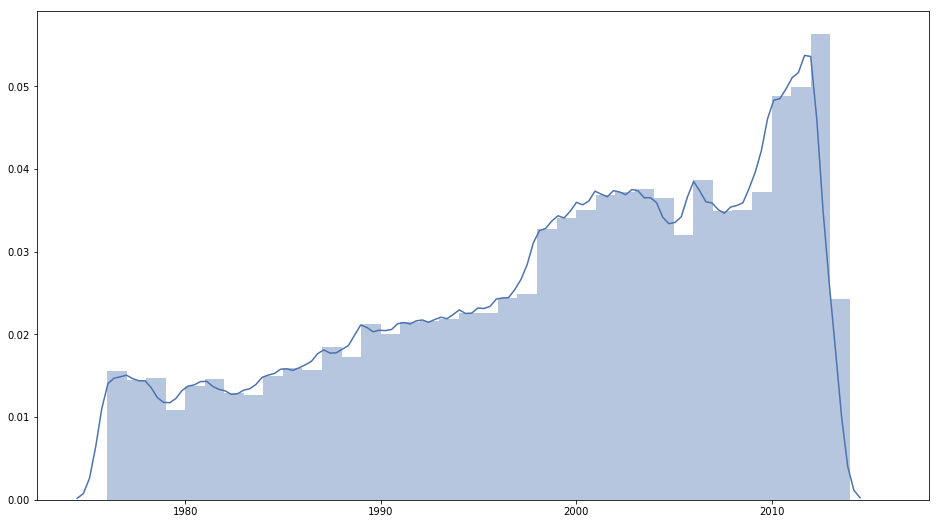

In [418]:
_, axs = plt.subplots(1, 1, figsize=(16, 9), sharey= True, sharex= True)

sns.distplot(years, bins=np.arange(1976, 2017, 1), ax=axs)

### 3.2 Histogram of patents per month

In [420]:
months = np.array(patents.date.str[5:7], np.int32)

In [422]:
months.shape

(4499998,)

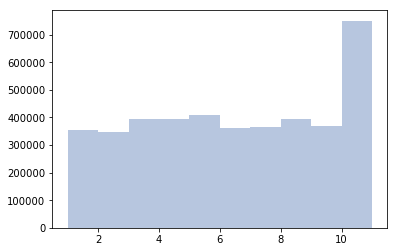

In [426]:
sns.distplot(months, bins=np.arange(1, 12, 1), kde=False)

In [430]:
'{0:0X}'.format(4324)

'10E4'

### 3.3 Histogram of patents per day

....

## 4. Graph software

### 4.1 What we tried

Our first library of choice was *networkx* to store, analyse and display our graphs. While trying to load the 89 million edges into a graph, we quickly noticed that *networkx* is too slow to handle such data sizes.

Looking for a graph network library that can handle many more nodes and edges, we discovered *graph-tool*. *graph-tool* stores vertices efficiently simply as an index between 0 and V-1, where V is the total number of vertices in the graph. Additional properties of the vertices (like the patent ID to identify them) can be stored alongside in a property variable. *graph-tool*'s algorithms are fast and efficient, but installing it proved to be quite challenging. 

Even though *graph-tool* is much faster than *networkx*, we are still reaching the limit of what our laptops can handle memory-wise (8GB). Therefore, if needed we will use a computer with more memory (16GB) to run more complex algorithms on the data.

### 4.2 Transforming the citations dataframe to a directed graph

### 4.3 Examples using the created graph

## 5. Statistics on the graph

## 6. Plans for the continuation of the project

### 6.1 Methods we will use on the graph

At this point in time, we have the full graph available that we want to analyse. From this network, we hope to find new insights into the patents' data in the following ways:

- Extract most cited patents. This means finding the vertices in the graph that have the highest in-degrees. When we have those patents, we can analyse if and how they are interconnected, as well as who are their inventors / assignees.


- Find the smallest maximum distance between any two patents. How many steps away is any patent from any other one?


- Go back in time: Is there a path from Snapchat's facial filters back in time to the invention of the transistor? We will try to find interesting examples of this type by searching for the shortest path between two nodes of interest.


Methods we are considering:

- Animated graphs that show patent applications and expirations throughout time in a network. graph-tool offers functions to build such an animation.





### 6.2 What we still need to figure out:




### 6.3 Timeplan



